# Project 1

In this project, you'll work on a modified version of the [Boston Housing Dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

You'll combine data from two files. Then preprocess and clean them before performing the final computation.

Table1:
- ID:       Identifier
- CRIM:     per capita crime rate by town
- ZN:       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS:    proportion of non-retail business acres per town
- CHAS:     Charles River dummy variable (= "Bound" if tract bounds river; "NoBound" otherwise)

Table2:
- ID:       Identifier
- NOX:      nitric oxides concentration (parts per 10 million)
- RM:       average number of rooms per dwelling
- AGE:      proportion of owner-occupied units built prior to 1940
- DIS:      weighted distances to five Boston employment centres
- RAD:      index of accessibility to radial highways
- TAX:      full-value property-tax rate per \$10,000
- PTRATIO:  pupil-teacher ratio by town
- B        1000:(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT:    % lower status of the population
- PRICE:     Median value of owner-occupied homes in $1000's



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset_path1 = './housing1.csv'
dataset_path2 = './housing2.csv'

In [3]:
# Read in the two datasets

# Your Code Here
dataset1 = pd.read_csv(dataset_path1)
dataset2 = pd.read_csv(dataset_path2)

In [4]:
dataset1.head()

,CRIM,ZN,INDUS,CHAS,ID
0,0.03615,80.0,4.95,NoBound,6
1,1.35472,0.0,8.14,NoBound,7
2,0.11069,0.0,13.89,Bound,8
3,0.04684,0.0,3.41,NoBound,9
4,5.70818,0.0,18.10,NoBound,10


In [5]:
dataset2.head()

,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,ID
0,0.472,6.849,70.3,3.1827,7.0,222.0,18.4,396.90,7.53,28.2,0
1,0.484,6.696,56.4,5.7321,5.0,370.0,17.6,396.90,7.18,23.9,1
2,0.448,6.030,85.5,5.6894,NaN,233.0,17.9,392.74,18.80,16.6,2
3,0.409,5.878,21.4,6.4980,4.0,345.0,18.9,396.21,8.10,22.0,3
4,NaN,5.362,96.2,2.1036,24.0,666.0,20.2,380.79,10.19,20.8,4


In [6]:
# Incorporate data from the first DataFrame into the second DataFrame. For that, perform the right kind of join on the common column. 
# Code Here
merged_dataset = pd.merge(dataset1, dataset2, how='right', on='ID')
merged_dataset.head()

,CRIM,ZN,INDUS,CHAS,ID,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.03615,80.0,4.95,NoBound,6,0.411,6.630,23.4,5.1167,4.0,245.0,19.2,396.90,4.70,27.9
1,1.35472,0.0,8.14,NoBound,7,0.538,6.072,100.0,4.1750,4.0,307.0,21.0,376.73,13.04,14.5
2,0.11069,0.0,13.89,Bound,8,0.550,5.951,93.8,2.8893,5.0,276.0,16.4,396.90,17.92,21.5
3,0.04684,0.0,3.41,NoBound,9,0.489,6.417,66.1,3.0923,2.0,270.0,17.8,392.18,8.81,22.6
4,5.70818,0.0,18.10,NoBound,10,0.532,6.750,74.9,3.3317,24.0,666.0,20.2,393.07,7.74,23.7


## Plot the Distributions for all attributes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6b042bcf8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fb6ae0f0f98>]], dtype=object)

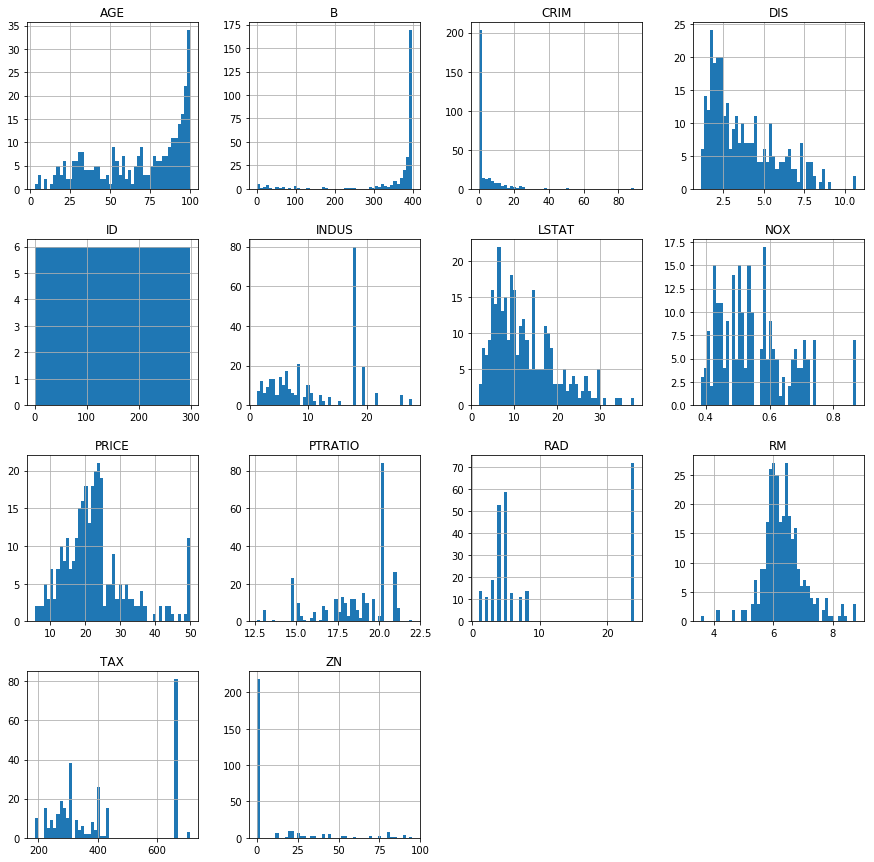

In [7]:
# Choose type of plot appropriately.

# Code Here
merged_dataset.hist(figsize=(15, 15), bins=50)

## Handle Missing Values

For floats, use mean value. For any other types, use the most common value.

In [8]:
# Code Here

# Fill NaN values with the "column mean" for floating types 
merged_dataset = merged_dataset.fillna(merged_dataset.mean())

# Replace NaN in string type field with the most common value 
cleaned_dataset = merged_dataset.fillna(merged_dataset.mode().iloc[0])

cleaned_dataset

,CRIM,ZN,INDUS,CHAS,ID,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.036150,80.000000,4.950000,NoBound,6,0.411000,6.630,23.4,5.1167,4.000000,245.0,19.2,396.90,4.70,27.9
1,1.354720,0.000000,8.140000,NoBound,7,0.538000,6.072,100.0,4.1750,4.000000,307.0,21.0,376.73,13.04,14.5
2,0.110690,0.000000,13.890000,Bound,8,0.550000,5.951,93.8,2.8893,5.000000,276.0,16.4,396.90,17.92,21.5
3,0.046840,0.000000,3.410000,NoBound,9,0.489000,6.417,66.1,3.0923,2.000000,270.0,17.8,392.18,8.81,22.6
4,5.708180,0.000000,18.100000,NoBound,10,0.532000,6.750,74.9,3.3317,24.000000,666.0,20.2,393.07,7.74,23.7
5,0.030490,55.000000,3.780000,NoBound,11,0.484000,6.874,28.1,6.4654,5.000000,370.0,17.6,387.97,4.61,31.2
6,0.144760,0.000000,10.010000,NoBound,12,0.547000,5.731,65.2,2.7592,6.000000,432.0,17.8,391.50,13.61,19.3
7,0.043790,80.000000,3.370000,NoBound,13,0.552858,5.787,31.1,6.6115,4.000000,337.0,16.1,396.90,10.24,19.4
8,0.261690,0.000000,9.900000,NoBound,14,0.552858,6.023,90.4,2.8340,9.755639,304.0,18.4,396.30,11.72,19.4
9,11.951100,0.000000,18.100000,NoBound,15,0.659000,5.608,100.0,1.2852,24.000000,666.0,20.2,332.09,12.13,27.9


## Map CHAS to numeric form

Note: 'Bound' should map to 1.0 while 'NoBound' should map to 0.0

In [9]:
# Code Here

# Get unique values from the column CHAS (done just for a case when the mapping done is not fixed and can be done uniformly)
labels = cleaned_dataset['CHAS'].unique().tolist()

# Actual mapping code
mapping = {'NoBound': 0.0, 'Bound': 1.0}
cleaned_dataset.replace({'CHAS': mapping}, inplace=True)

In [13]:
cleaned_dataset.head()

,CRIM,ZN,INDUS,CHAS,ID,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.03615,80.0,4.95,0.0,6,0.411,6.630,23.4,5.1167,4.0,245.0,19.2,396.90,4.70,27.9
1,1.35472,0.0,8.14,0.0,7,0.538,6.072,100.0,4.1750,4.0,307.0,21.0,376.73,13.04,14.5
2,0.11069,0.0,13.89,1.0,8,0.550,5.951,93.8,2.8893,5.0,276.0,16.4,396.90,17.92,21.5
3,0.04684,0.0,3.41,0.0,9,0.489,6.417,66.1,3.0923,2.0,270.0,17.8,392.18,8.81,22.6
4,5.70818,0.0,18.10,0.0,10,0.532,6.750,74.9,3.3317,24.0,666.0,20.2,393.07,7.74,23.7


In [21]:
# Remove the 'ID' column before moving further

# Code Here
cleaned_dataset = cleaned_dataset.drop(columns=['ID'])

In [23]:
cleaned_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.036150,80.000000,4.950000,0.0,0.411000,6.630,23.4,5.1167,4.000000,245.0,19.2,396.90,4.70,27.9
1,1.354720,0.000000,8.140000,0.0,0.538000,6.072,100.0,4.1750,4.000000,307.0,21.0,376.73,13.04,14.5
2,0.110690,0.000000,13.890000,1.0,0.550000,5.951,93.8,2.8893,5.000000,276.0,16.4,396.90,17.92,21.5
3,0.046840,0.000000,3.410000,0.0,0.489000,6.417,66.1,3.0923,2.000000,270.0,17.8,392.18,8.81,22.6
4,5.708180,0.000000,18.100000,0.0,0.532000,6.750,74.9,3.3317,24.000000,666.0,20.2,393.07,7.74,23.7
5,0.030490,55.000000,3.780000,0.0,0.484000,6.874,28.1,6.4654,5.000000,370.0,17.6,387.97,4.61,31.2
6,0.144760,0.000000,10.010000,0.0,0.547000,5.731,65.2,2.7592,6.000000,432.0,17.8,391.50,13.61,19.3
7,0.043790,80.000000,3.370000,0.0,0.552858,5.787,31.1,6.6115,4.000000,337.0,16.1,396.90,10.24,19.4
8,0.261690,0.000000,9.900000,0.0,0.552858,6.023,90.4,2.8340,9.755639,304.0,18.4,396.30,11.72,19.4
9,11.951100,0.000000,18.100000,0.0,0.659000,5.608,100.0,1.2852,24.000000,666.0,20.2,332.09,12.13,27.9


## Ridge Regression 

Perform [Ridge Regression](https://onlinecourses.science.psu.edu/stat857/node/155/) on the data.

(Note: We'll go over Regression and other Machine Learning methods in the next module. You just need to implement the following equation here).

$$
\beta = (X^{T}X + \lambda I)^{-1}X^{T}y
$$

where `X` is the data in the columns apart from 'PRICE' and `y` is the target (i.e 'PRICE').

Use $\lambda = 0.1$

In [59]:
# Code Here
beta = None
X = cleaned_dataset.loc[:, cleaned_dataset.columns != 'PRICE'].values
y = cleaned_dataset['PRICE'].values

X_t_X = np.dot(X.transpose(), X)    # shape is (13, 13)
identity_matrix = np.identity(X_t_X.shape[0]) * 0.1       # shape is (13, 13)
first_inverse_matrix = np.linalg.inv(np.add(X_t_X, identity_matrix)) # shape is (13, 13)
beta = np.dot(np.dot(first_inverse_matrix , X.transpose()), y)    # shape is (13, )
beta

array([ -1.15256270e-01,   3.70355862e-02,  -4.01835155e-02,
         3.69838325e+00,  -3.90993891e+00,   6.26324261e+00,
        -2.70915378e-02,  -1.14477261e+00,   6.41649666e-02,
        -4.02150093e-03,  -4.68970332e-01,   1.54806861e-02,
        -3.45602461e-01])